In [1]:
library('igraph')
library('Matrix')
library('pracma')

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'Matrix' was built under R version 3.6.3"Warning message:
"package 'pracma' was built under R version 3.6.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



In [2]:
install.packages("gsubfn")
install.packages("resample")
library('gsubfn')
library('resample')

package 'gsubfn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tamee\AppData\Local\Temp\Rtmpae1cgk\downloaded_packages
package 'resample' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tamee\AppData\Local\Temp\Rtmpae1cgk\downloaded_packages


Warning message:
"package 'gsubfn' was built under R version 3.6.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.6.3"
Attaching package: 'resample'

The following object is masked from 'package:gsubfn':

    cat0



(a) Generate an undirected preferential attachment network with 1000 nodes, where each
new node attaches to m = 1 old nodes.

png 
  2

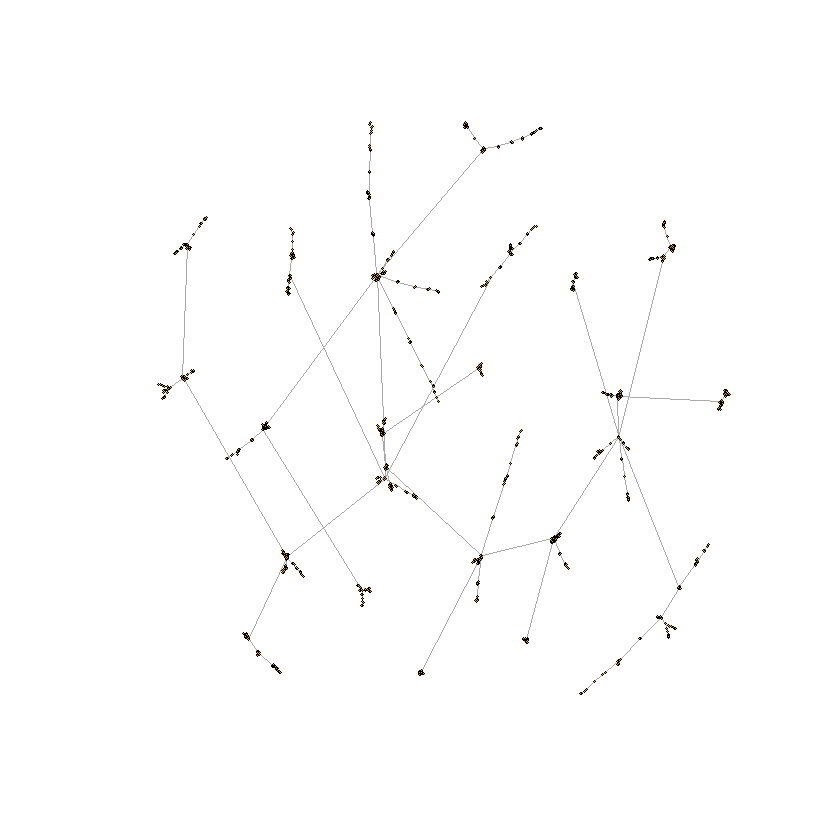

In [16]:
# Create graph: 
g <- sample_pa(1000, m=1, directed=FALSE)

# Plot graph 
plot(g, vertex.size=1, vertex.label=NA)
png(file="plots/2_2_a_graph.png", width=600, height=450)

plot(g, vertex.size=1, vertex.label=NA)

dev.off()

(b) Let a random walker start from a randomly selected node (no teleportation). We
use t to denote the number of steps that the walker has taken. Measure the average
distance (defined as the shortest path length) hs(t)i of the walker from his starting
point at step t. Also, measure the variance σ
2
(t) = h(s(t) − hs(t)i)
2
i of this distance.
Plot hs(t)i v.s. t and σ
2
(t) v.s. t. Here, the average h·i is over random choices of the
starting nodes.

In [17]:
# Transition matrix from discussion notebook 
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [18]:
# Random walk function from discussion notebook 
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    # Save distances at each step in a vector 
    stepwise_distances = vector(mode="numeric",length=num_steps)
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        stepwise_distances[i] = shortest.paths(g, start_node, v)[1][1]
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return (list(stepwise_distances, v))
}

In [19]:
# Get GCC so the transition matrix function works 
g_components <- clusters(g)
    # which is the largest component
ix <- which.max(g_components$csize) # like np.argmax(...)
    # get the subgraph correspondent to just the giant component
gcc <- induced.subgraph(g, which(g_components$membership == ix))

In [23]:
# Try a random walk num_trials times 
num_trials = 100
num_steps = 400

# Initialize an array of distances
distances = matrix(NA, nrow=num_trials, ncol=num_steps)
# Initialize vector of end nodes 
end_nodes = vector(mode="numeric",length=num_trials)


# Run the random walks 
for(i in 1:num_trials){
    # Randomly pick a start node 
    start_node <- sample(1:vcount(gcc), 1) 
    list[stepwise_distances, v] = random_walk(gcc, num_steps, start_node)
    # Add stepwise_distances as column i in the matrix 
    distances[i,] = stepwise_distances 
    end_nodes[i] = v 
    
}


[1] 100 400


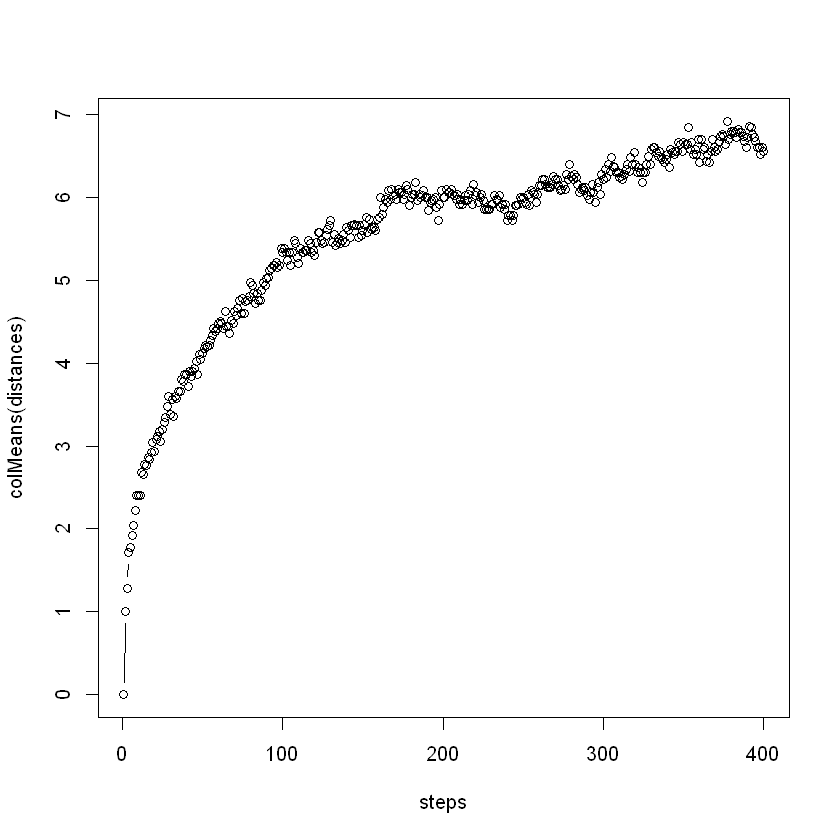

png 
  2

png 
  2

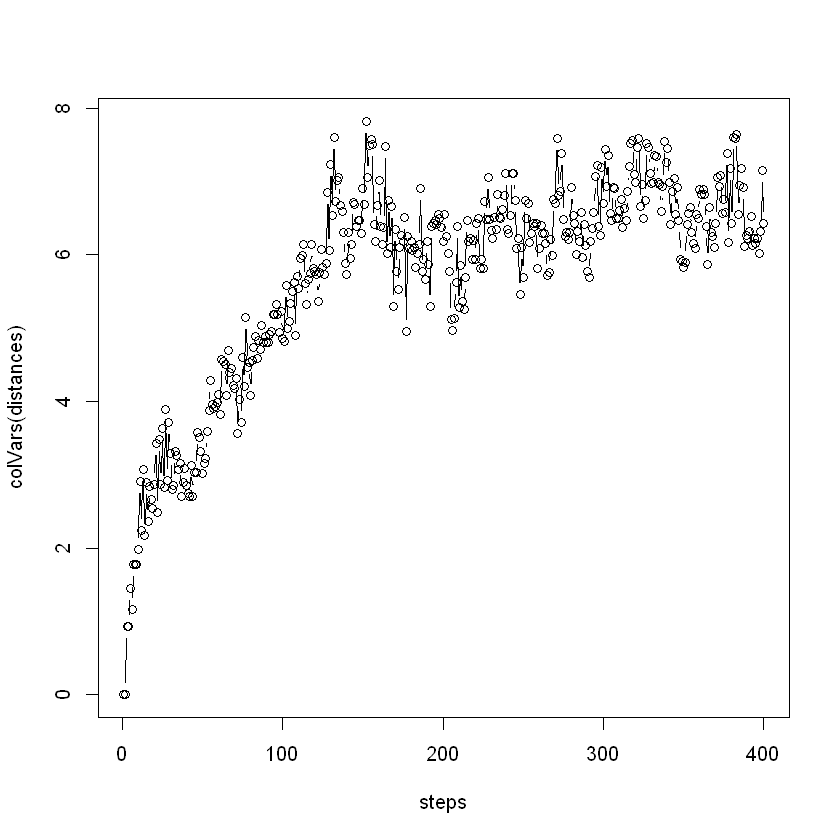

In [24]:
# Plot steps and mean distances 
print(dim(distances))
steps = seq(1, num_steps, 1)
plot(steps,colMeans(distances),type="b")
plot(steps,colVars(distances),type="b")
png(file="plots/2_2_b_mean.png", width=600, height=450)

plot(steps,colMeans(distances),type="b")

dev.off()
png(file="plots/2_2_b_var.png", width=600, height=450)

plot(steps,colVars(distances),type="b")

dev.off()

(c) Measure the degree distribution of the nodes reached at the end of the random walk.
How does it compare to the degree distribution of graph?

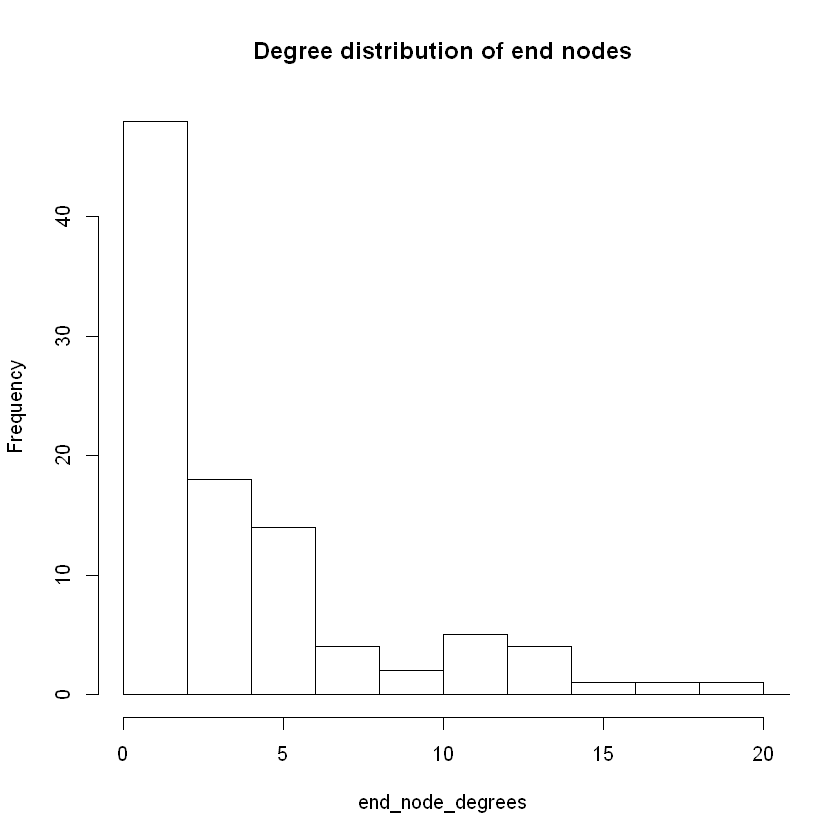

png 
  2

png 
  2

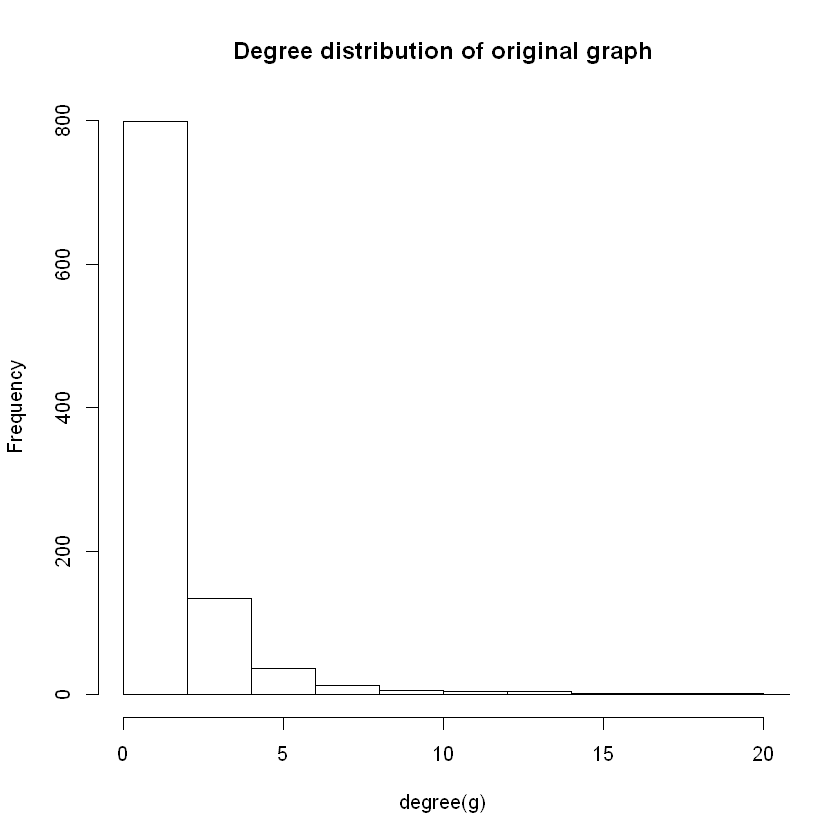

In [25]:
# Convert vertex to degrees 
end_node_degrees = vector(mode="numeric",length=num_trials)
for(i in 1:num_trials){
    node = end_nodes[i] 
    end_node_degrees[i] = degree(gcc)[node]
}
# Plot distribution of end_node_degrees with 9 bins 
hist(end_node_degrees, 9, xlim=c(0,20),main="Degree distribution of end nodes")

# Plot distribution of end_node_degrees with 9 bins 
hist(degree(g), 9, xlim=c(0,20),main="Degree distribution of original graph")
png(file="plots/2_2_c_end_nodes.png", width=600, height=450)

hist(end_node_degrees, 9, xlim=c(0,20),main="Degree distribution of end nodes")

dev.off()
png(file="plots/2_2_c_og.png", width=600, height=450)

hist(degree(g), 9, xlim=c(0,20),main="Degree distribution of original graph")

dev.off()


(d) Repeat 2(b) for preferential attachment networks with 100 and 10000 nodes, and
m = 1. Compare the results and explain qualitatively. Does the diameter of the
network play a role?

In [11]:
#n=100
g3 <- sample_pa(100, m=1,directed=FALSE)
# Get GCC so the transition matrix function works 
g_components <- clusters(g3)
    # which is the largest component
ix <- which.max(g_components$csize) # like np.argmax(...)
    # get the subgraph correspondent to just the giant component
gcc3 <- induced.subgraph(g3, which(g_components$membership == ix))
# Try a random walk num_trials times 
num_trials = 100
num_steps = 400 

# Initialize an array of distances
distances = matrix(NA, nrow=num_trials, ncol=num_steps)
# Initialize vector of end nodes 
end_nodes = vector(mode="numeric",length=num_trials)


# Run the random walks 
for(i in 1:num_trials){
    # Randomly pick a start node 
    start_node <- sample(1:vcount(gcc3), 1) 
    list[stepwise_distances, v] = random_walk(gcc3, num_steps, start_node)
    # Add stepwise_distances as column i in the matrix 
    distances[i,] = stepwise_distances 
    end_nodes[i] = v 
    
}


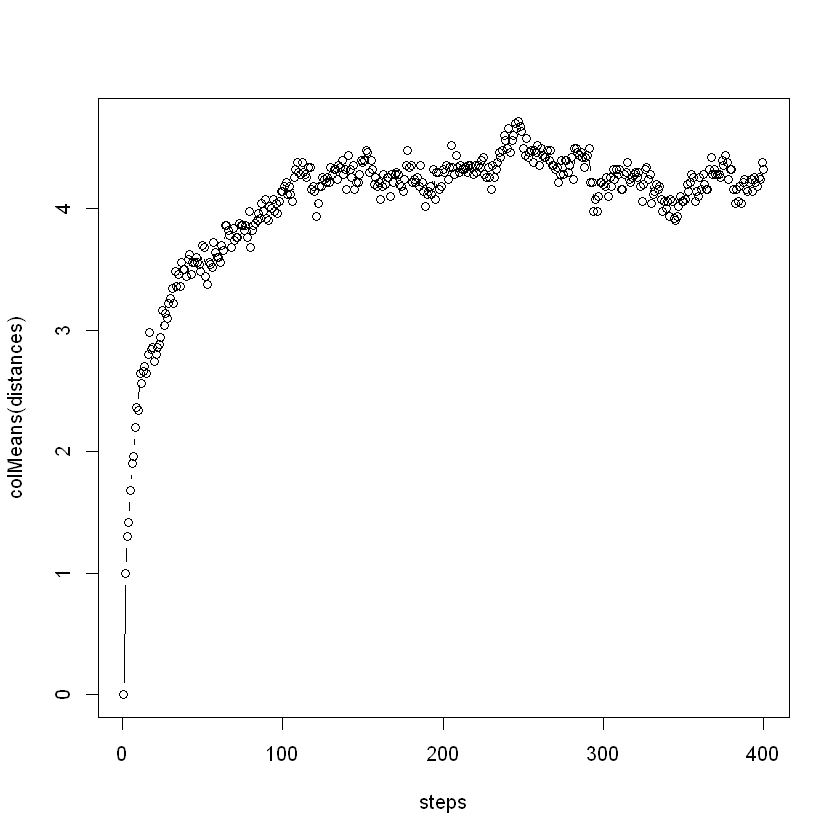

png 
  2

png 
  2

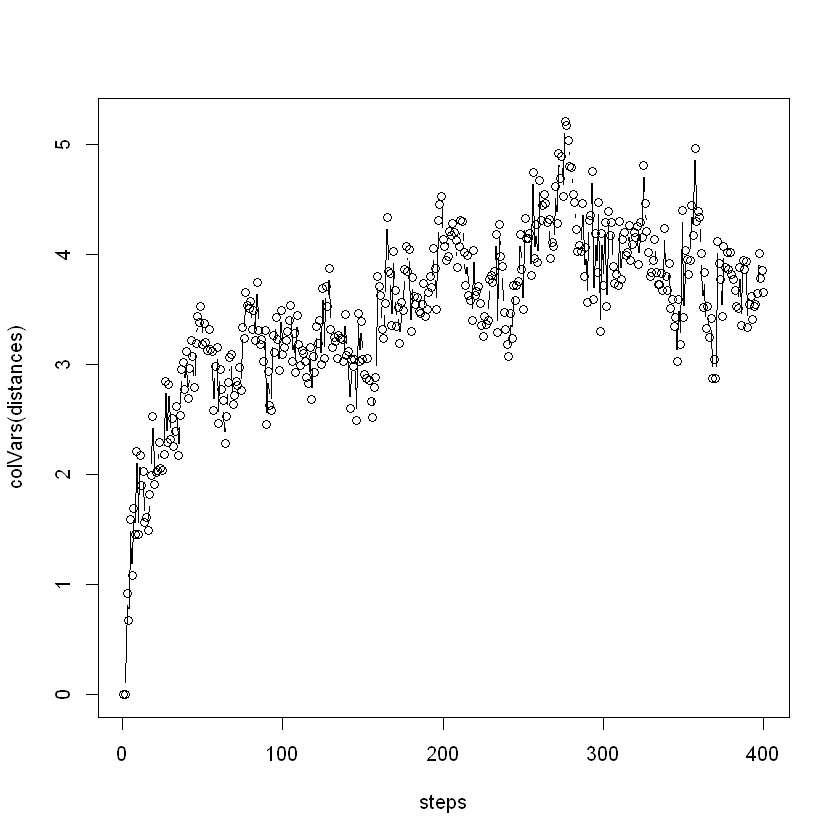

In [12]:
steps = seq(1, num_steps, 1)

plot(steps,colMeans(distances),type="b")
plot(steps,colVars(distances),type="b")

png(file="plots/2_2_d_100m.png", width=600, height=450)

plot(steps,colMeans(distances),type="b")

dev.off()
png(file="plots/2_2_d_100v.png", width=600, height=450)

plot(steps,colVars(distances),type="b")

dev.off()

In [14]:
#n=10000
g2 <- sample_pa(10000, m=1,, directed=FALSE)
# Get GCC so the transition matrix function works 
g_components <- clusters(g2)
    # which is the largest component
ix <- which.max(g_components$csize) # like np.argmax(...)
    # get the subgraph correspondent to just the giant component
gcc2 <- induced.subgraph(g2, which(g_components$membership == ix))
# Try a random walk num_trials times 
num_trials = 50 
num_steps = 400 

# Initialize an array of distances
distances = matrix(NA, ncol=num_steps, nrow=num_trials)
# Initialize vector of end nodes 
end_nodes = vector(mode="numeric",length=num_trials)


# Run the random walks 
for(i in 1:num_trials){
    # Randomly pick a start node 
    start_node <- sample(1:vcount(gcc2), 1) 
    list[stepwise_distances, v] = random_walk(gcc2, num_steps, start_node)
    # Add stepwise_distances as column i in the matrix 
    distances[i,] = stepwise_distances 
    end_nodes[i] = v 
    
}


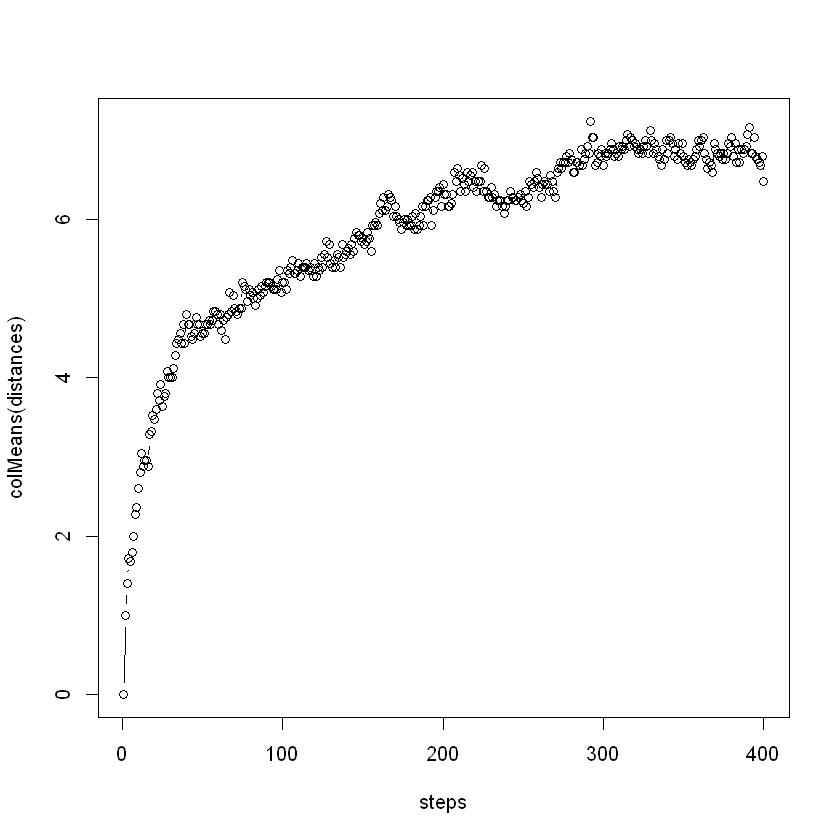

png 
  2

png 
  2

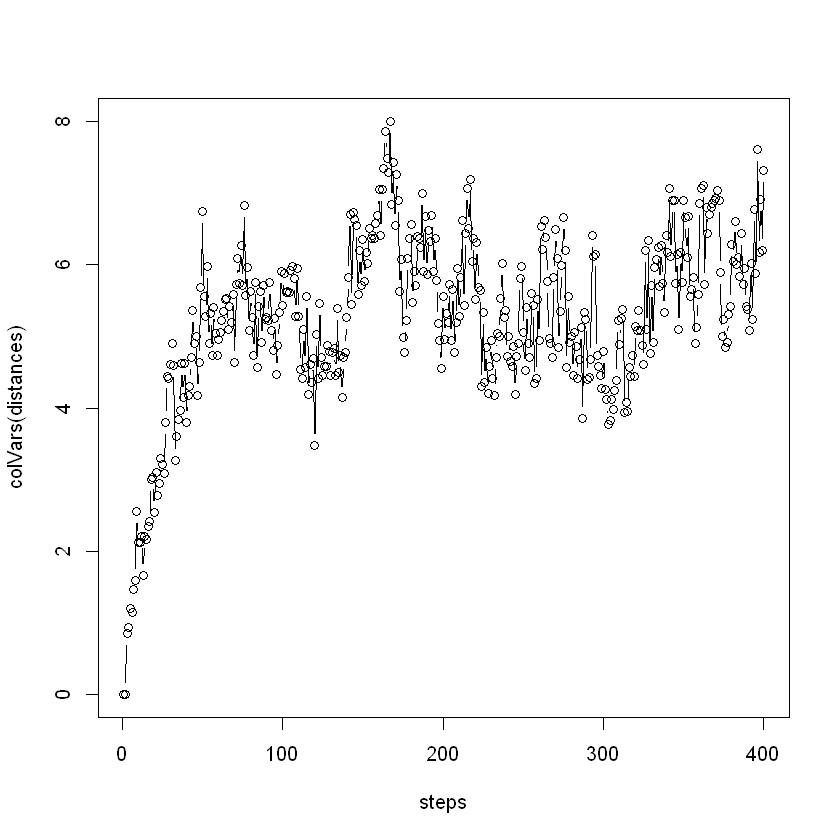

In [15]:
plot(steps,colMeans(distances),type="b")
plot(steps,colVars(distances),type="b")

png(file="plots/2_2_d_10000m.png", width=600, height=450)

plot(steps,colMeans(distances),type="b")

dev.off()
png(file="plots/2_2_d_10000v.png", width=600, height=450)

plot(steps,colVars(distances),type="b")

dev.off()

In [16]:
print("Diameters: n=100,1000,10000")
print(diameter(g3))
print(diameter(g))
print(diameter(g2))

[1] "Diameters: n=100,1000,10000"
[1] 13
[1] 32
[1] 56


Looks like diameter has minimal impact to variances, and negligible impact to means.